___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

"***Employee Churn Analysis Project***". 

In this project, we will examine what Employee Churn is, and how it is different from customer churn.

Different classification algorithms will be implemented to make predictions. 

At the end of the project, we will deploy your model using *Streamlit*.

In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

Variables of this dataset are as follows:

- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.


## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which we can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split,cross_val_score
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.preprocessing import scale,StandardScaler, MinMaxScaler,Normalizer,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ClassPredictionError
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df = pd.read_csv('hr_employee_attrition.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [5]:
print(f'Duplicate items in this dataset is: {df.duplicated().sum()}')

Duplicate items in this dataset is: 3008


In [6]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
df[(df['satisfaction_level']== 0.46) & (df['average_montly_hours']== 139) & (df['last_evaluation']== 0.57)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
23,0.46,0.57,2,139,3,0,1,0,sales,low
396,0.46,0.57,2,139,3,0,1,0,sales,low
12023,0.46,0.57,2,139,3,0,1,0,sales,low
12396,0.46,0.57,2,139,3,0,1,0,sales,low
14234,0.46,0.57,2,139,3,0,1,0,sales,low
14607,0.46,0.57,2,139,3,0,1,0,sales,low


In [8]:
print('Number of unique Salary: {}'.format(len(df.salary.unique())))
print('Number of unique Department: {}'.format(len(df.Department.unique())))

Number of unique Salary: 3
Number of unique Department: 10


In [9]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Data Visualization & Insights

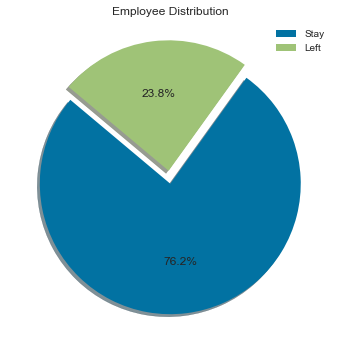

In [10]:
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(df['left'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Stay','Left'])
plt.title('Employee Distribution')
plt.axis('off');

In [11]:
left = df[df["left"] == 1] 
stay = df[df["left"] == 0]
left.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,3571.0,0.440098,0.263933,0.09,0.13,0.41,0.73,0.92
last_evaluation,3571.0,0.718113,0.197673,0.45,0.52,0.79,0.90,1.00
number_project,3571.0,3.855503,1.818165,2.00,2.00,4.00,6.00,7.00
average_montly_hours,3571.0,207.419210,61.202825,126.00,146.00,224.00,262.00,310.00
time_spend_company,3571.0,3.876505,0.977698,2.00,3.00,4.00,5.00,6.00
Work_accident,3571.0,0.047326,0.212364,0.00,0.00,0.00,0.00,1.00
left,3571.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,3571.0,0.005321,0.072759,0.00,0.00,0.00,0.00,1.00


In [12]:
stay.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11428.0,0.666810,0.217104,0.12,0.54,0.69,0.84,1.0
last_evaluation,11428.0,0.715473,0.162005,0.36,0.58,0.71,0.85,1.0
number_project,11428.0,3.786664,0.979884,2.00,3.00,4.00,4.00,6.0
average_montly_hours,11428.0,199.060203,45.682731,96.00,162.00,198.00,238.00,287.0
time_spend_company,11428.0,3.380032,1.562348,2.00,2.00,3.00,4.00,10.0
Work_accident,11428.0,0.175009,0.379991,0.00,0.00,0.00,0.00,1.0
left,11428.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
promotion_last_5years,11428.0,0.026251,0.159889,0.00,0.00,0.00,0.00,1.0


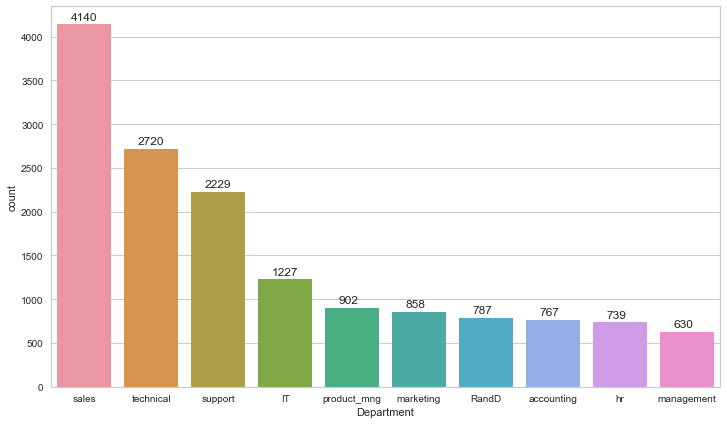

In [13]:
fig, ax = plt.subplots( figsize=(12, 7))
g = sns.countplot(x = 'Department',order=df.Department.value_counts().index, data = df)
for p in g.patches:
   g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+50))

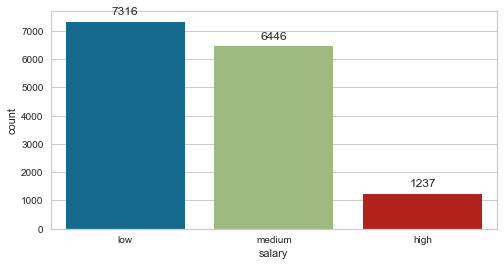

In [14]:
plt.figure(figsize=(8, 4))
vizz=sns.countplot('salary',data=df)
for p in vizz.patches:
    vizz.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

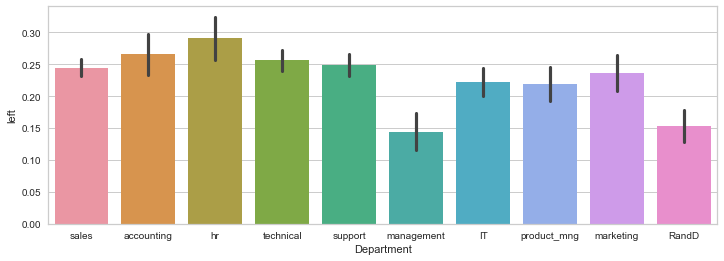

In [15]:
fig = plt.figure(figsize=(12,4))
sns.barplot(x='Department',y='left',data=df)
plt.show();

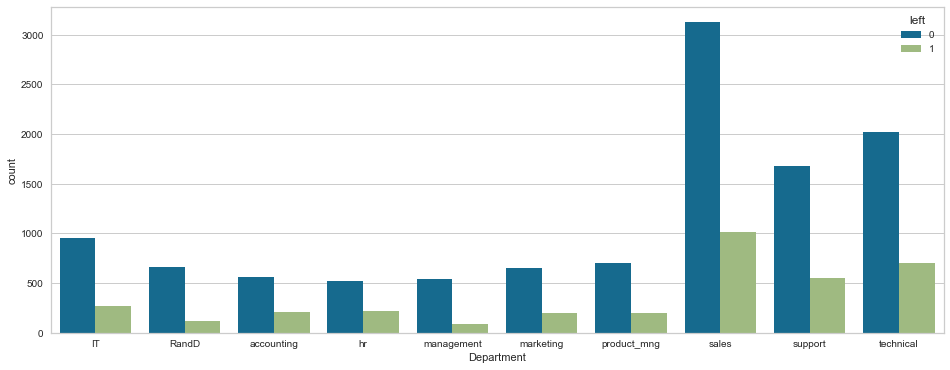

In [16]:
plt.figure(figsize=(16,6))
subgrade_order = sorted(df['Department'].unique())
sns.countplot(x='Department',data=df,order = subgrade_order,hue='left');

In [17]:
dept_left = ['Department', 'left']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[dept_left[0]], df[dept_left[1]]).style.background_gradient(cmap = cm)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [18]:
salary_left = ['salary', 'left']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[salary_left[0]], df[salary_left[1]]).style.background_gradient(cmap = cm)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


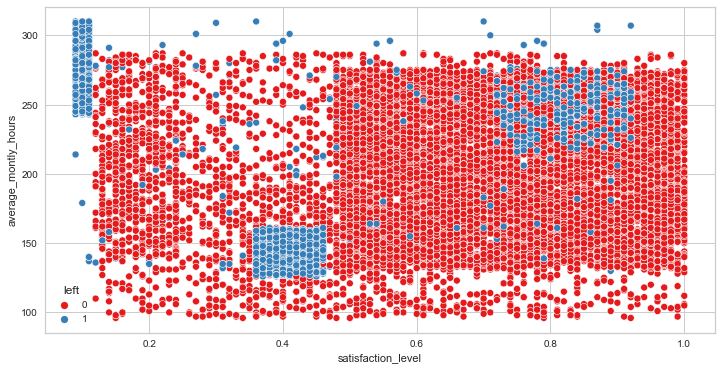

In [19]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=df['satisfaction_level'],y=df['average_montly_hours'],hue=df['left'],palette='Set1')
plt.show();

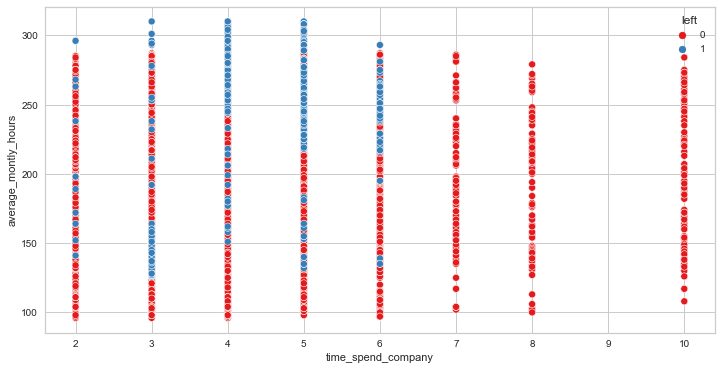

In [20]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=df['time_spend_company'],y=df['average_montly_hours'],hue=df['left'],palette='Set1')
plt.show();

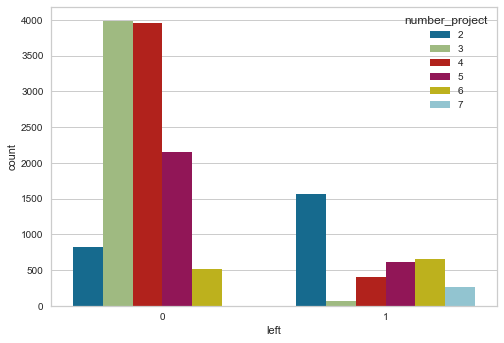

In [21]:
sns.countplot('left', data = df, hue = 'number_project');

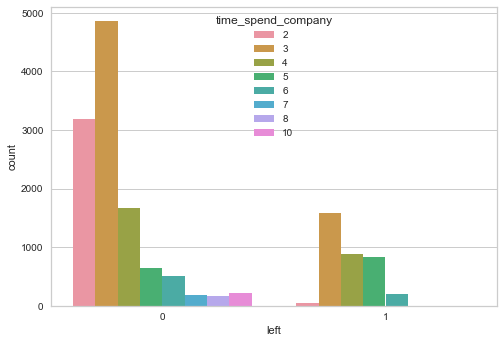

In [22]:
sns.countplot('left', data = df, hue = 'time_spend_company');

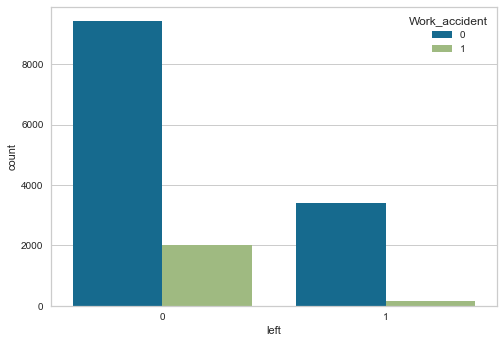

In [23]:
sns.countplot('left', data = df, hue = 'Work_accident');

In [24]:
df['productivity'] = df['number_project'] / df['time_spend_company']
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,productivity
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.666667
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.833333
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1.750000
3,0.72,0.87,5,223,5,0,1,0,sales,low,1.000000
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0.666667
14995,0.37,0.48,2,160,3,0,1,0,support,low,0.666667
14996,0.37,0.53,2,143,3,0,1,0,support,low,0.666667
14997,0.11,0.96,6,280,4,0,1,0,support,low,1.500000


### Missing Value Detection

In [25]:
def missing_values(df):
        mis_val = df.isnull().sum()        
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)        
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"+"There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")        
        return mis_val_table_ren_columns
    
missing_values(df)

Dataframe has 11 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Outlier Detection

In [26]:
num_features = df[['satisfaction_level','last_evaluation','average_montly_hours','time_spend_company','productivity']]
num_features

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,productivity
0,0.38,0.53,157,3,0.666667
1,0.80,0.86,262,6,0.833333
2,0.11,0.88,272,4,1.750000
3,0.72,0.87,223,5,1.000000
4,0.37,0.52,159,3,0.666667
...,...,...,...,...,...
14994,0.40,0.57,151,3,0.666667
14995,0.37,0.48,160,3,0.666667
14996,0.37,0.53,143,3,0.666667
14997,0.11,0.96,280,4,1.500000


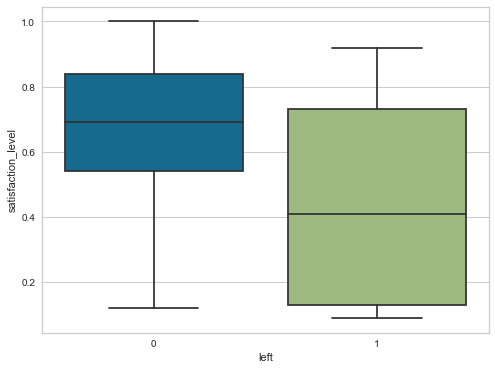

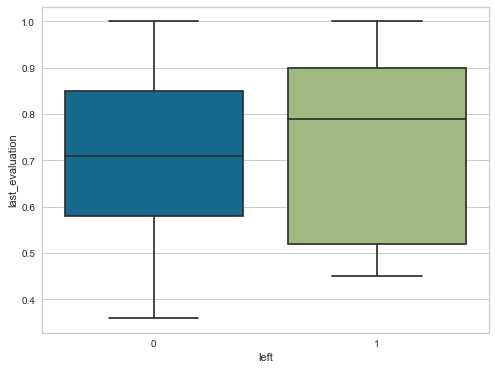

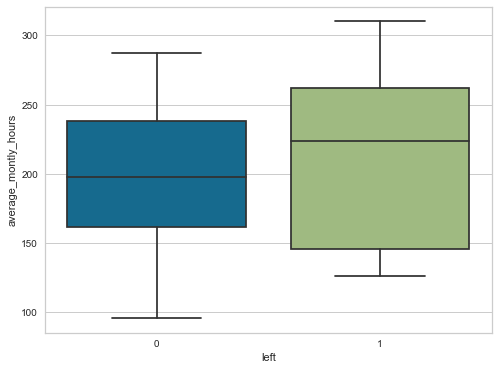

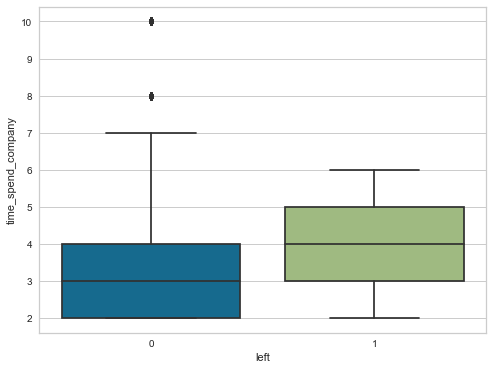

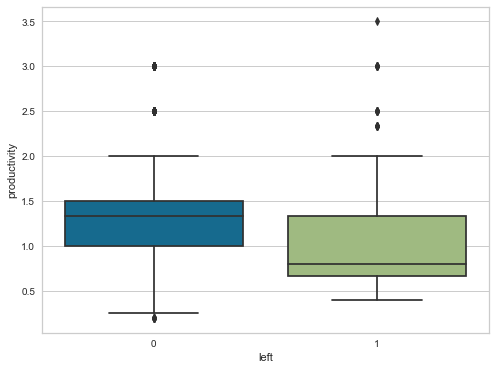

In [27]:
for i in num_features.columns:
    plt.figure(i,figsize=(8,6))
    sns.boxplot(x=df['left'], y=num_features[i], data=df);

In [28]:
def detect_outliers(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

for col in num_features:
    if detect_outliers(df, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(df, col)[2], col))

There are 376 outliers in time_spend_company


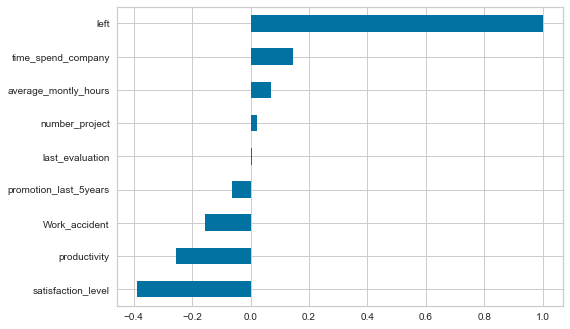

In [29]:
df.corr()["left"].sort_values().plot.barh();

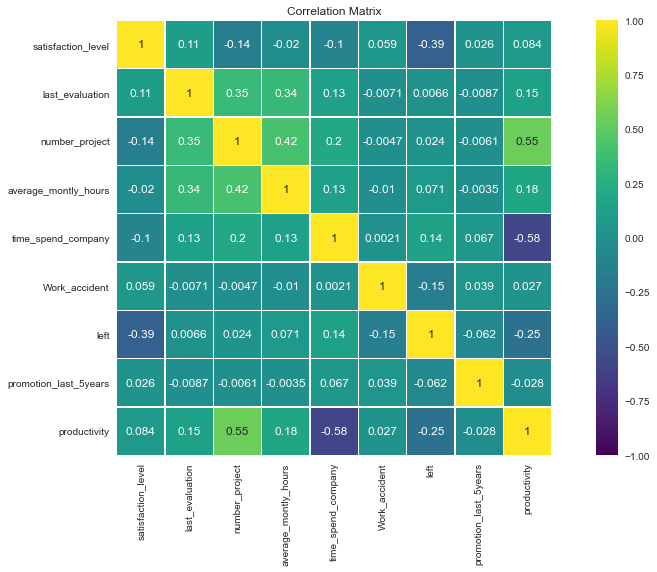

In [30]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")
plt.show();

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [31]:
num_features

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,productivity
0,0.38,0.53,157,3,0.666667
1,0.80,0.86,262,6,0.833333
2,0.11,0.88,272,4,1.750000
3,0.72,0.87,223,5,1.000000
4,0.37,0.52,159,3,0.666667
...,...,...,...,...,...
14994,0.40,0.57,151,3,0.666667
14995,0.37,0.48,160,3,0.666667
14996,0.37,0.53,143,3,0.666667
14997,0.11,0.96,280,4,1.500000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_num_df= scaler.fit_transform(num_features)
scaled_num_df=pd.DataFrame(scaled_num_df)
scaled_num_df.columns=num_features.columns
scaled_num_df

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,productivity
0,0.318681,0.265625,0.285047,0.125,0.141414
1,0.780220,0.781250,0.775701,0.500,0.191919
2,0.021978,0.812500,0.822430,0.250,0.469697
3,0.692308,0.796875,0.593458,0.375,0.242424
4,0.307692,0.250000,0.294393,0.125,0.141414
...,...,...,...,...,...
14994,0.340659,0.328125,0.257009,0.125,0.141414
14995,0.307692,0.187500,0.299065,0.125,0.141414
14996,0.307692,0.265625,0.219626,0.125,0.141414
14997,0.021978,0.937500,0.859813,0.250,0.393939


#### Salary Encoding


In [33]:
df["salary"] = df["salary"].apply(lambda x: 1 if x=="low" else 2 if x=="medium" else 3)

In [34]:
df['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

In [35]:
final_df=pd.concat([scaled_num_df, pd.get_dummies(df.Department, drop_first = True, prefix='Dept', prefix_sep='_'), df[['salary', 'Work_accident', 'promotion_last_5years', 'left']]],axis=1)
final_df

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,productivity,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical,salary,Work_accident,promotion_last_5years,left
0,0.318681,0.265625,0.285047,0.125,0.141414,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0.780220,0.781250,0.775701,0.500,0.191919,0,0,0,0,0,0,1,0,0,2,0,0,1
2,0.021978,0.812500,0.822430,0.250,0.469697,0,0,0,0,0,0,1,0,0,2,0,0,1
3,0.692308,0.796875,0.593458,0.375,0.242424,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.307692,0.250000,0.294393,0.125,0.141414,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.257009,0.125,0.141414,0,0,0,0,0,0,0,1,0,1,0,0,1
14995,0.307692,0.187500,0.299065,0.125,0.141414,0,0,0,0,0,0,0,1,0,1,0,0,1
14996,0.307692,0.265625,0.219626,0.125,0.141414,0,0,0,0,0,0,0,1,0,1,0,0,1
14997,0.021978,0.937500,0.859813,0.250,0.393939,0,0,0,0,0,0,0,1,0,1,0,0,1


In [36]:
print(f'Duplicate items in this dataset is: {final_df.duplicated().sum()}')

Duplicate items in this dataset is: 3008


In [37]:
# Drop duplicate records
final_df = final_df[~final_df.duplicated()]
final_df.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,productivity,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical,salary,Work_accident,promotion_last_5years,left
0,0.318681,0.265625,0.285047,0.125,0.141414,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0.780220,0.781250,0.775701,0.500,0.191919,0,0,0,0,0,0,1,0,0,2,0,0,1
2,0.021978,0.812500,0.822430,0.250,0.469697,0,0,0,0,0,0,1,0,0,2,0,0,1
3,0.692308,0.796875,0.593458,0.375,0.242424,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.307692,0.250000,0.294393,0.125,0.141414,0,0,0,0,0,0,1,0,0,1,0,0,1


In [38]:
final_df.shape

(11991, 18)

## 5. Model Building

### Split Data as Train and Test Set

In [39]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [40]:
X = final_df.drop('left', axis = 1)
y = final_df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [41]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:23<00:00,  1.22it/s]


In [42]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.99               0.96     0.96      0.99   
LGBMClassifier                     0.98               0.96     0.96      0.98   
XGBClassifier                      0.98               0.96     0.96      0.98   
BaggingClassifier                  0.98               0.96     0.96      0.98   
ExtraTreesClassifier               0.98               0.95     0.95      0.98   
DecisionTreeClassifier             0.96               0.95     0.95      0.97   
AdaBoostClassifier                 0.96               0.93     0.93      0.96   
KNeighborsClassifier               0.95               0.93     0.93      0.95   
SVC                                0.96               0.93     0.93      0.96   
LabelPropagation                   0.95               0.93     0.93      0.95   
LabelSpreading              

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___